# Example usage of Single-agent ChemGraph

## Initiate the ChemGraph agent

In [8]:
from chemgraph.agent.llm_agent import ChemGraph

workflow_type = "single_agent"

# Adjust model_name with your preferred model.
cg = ChemGraph(model_name='gpt-4o-mini', workflow_type = workflow_type, structured_output=True, return_option="state")


2025-11-19 23:08:03,703 - chemgraph.tools.openai_loader - INFO - Loading OpenAI model: gpt-4o-mini


INFO:chemgraph.tools.openai_loader:Loading OpenAI model: gpt-4o-mini


2025-11-19 23:08:03,708 - chemgraph.tools.openai_loader - INFO - Requested model: gpt-4o-mini


INFO:chemgraph.tools.openai_loader:Requested model: gpt-4o-mini


2025-11-19 23:08:03,710 - chemgraph.tools.openai_loader - INFO - OpenAI model loaded successfully


INFO:chemgraph.tools.openai_loader:OpenAI model loaded successfully


2025-11-19 23:08:03,711 - chemgraph.graphs.single_agent - INFO - Constructing single agent graph


INFO:chemgraph.graphs.single_agent:Constructing single agent graph


2025-11-19 23:08:03,718 - chemgraph.graphs.single_agent - INFO - Graph construction completed


INFO:chemgraph.graphs.single_agent:Graph construction completed


## Visualize the single-agent ChemGraph

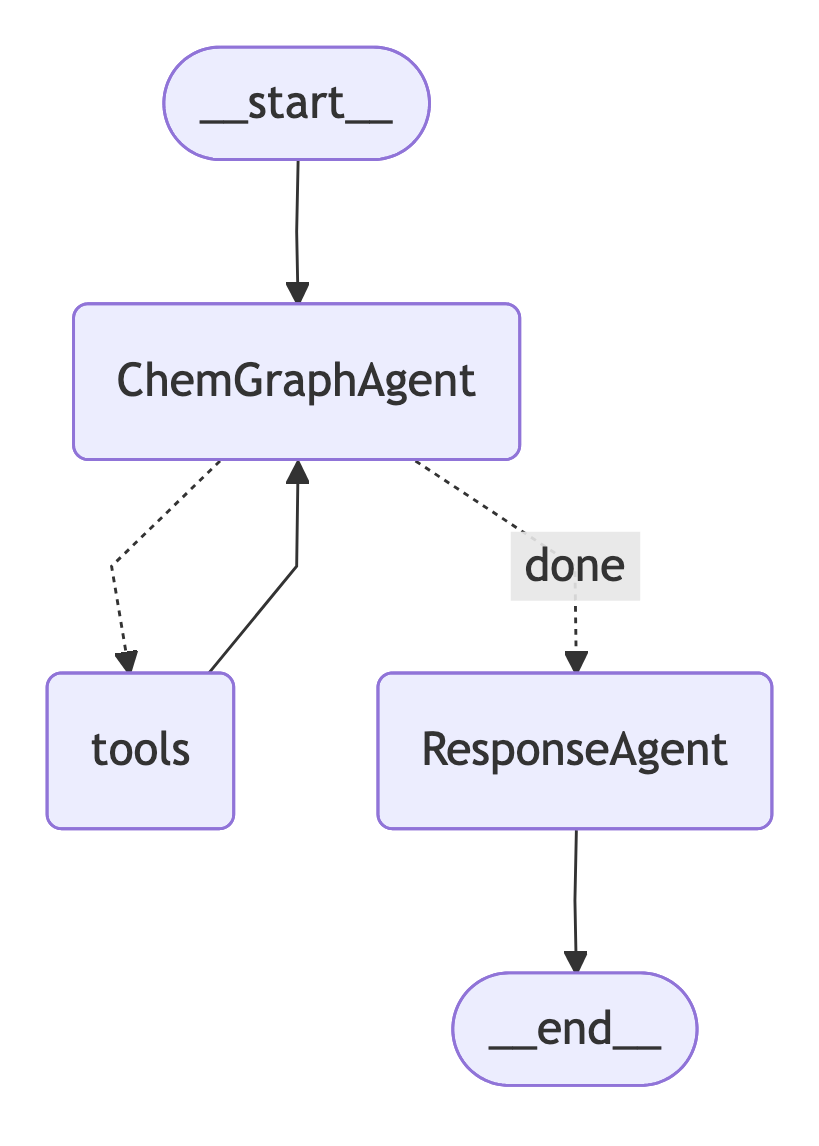

In [9]:
cg.visualize()

## ChemGraph Usage Examples

In [13]:
# Get a SMILES string from a molecule name
query_1 = "What is the smiles string caffeine?"
result_1 = await cg.run(query, config={"configurable": {"thread_id": 1}})

================================ Human Message =================================

What is the smiles string caffeine?
================================== Ai Message ==================================

The SMILES string for caffeine is: **CN1C=NC2=C1C(=O)N(C(=O)N2C)C**.
================================ Human Message =================================

{"answer":"CN1C=NC2=C1C(=O)N(C(=O)N2C)C"}


## cg.run() returns a state dictionary that can be further used for analysis

In [14]:
print(result_1)

{'messages': [{'content': 'What is the smiles string caffeine?', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': 'd0f7b5b5-4949-4126-9cea-6ec6072b8519'}, {'content': '', 'additional_kwargs': {'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 19, 'prompt_tokens': 4167, 'total_tokens': 4186, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 4096}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CdrDdgEAdh7tCL17xHlIIISllk1jE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'lc_run--0a36163e-2e07-4e81-8565-a9a9f179e1ea-0', 'tool_calls': [{'name': 'molecule_name_to_smiles', 'args': {'name': 'caffeine'}, 'id': 'call_eMjM8MWmjRNuSBjIV2vXNDfn'

In [16]:
# Calculate vibrational frequency of CO2 using MACE MP
query_2 = "What are the vibrational frequencies of carbon dioxide using MACE MP?"
result_2 = await cg.run(query_2, {"thread_id": 2})

================================ Human Message =================================

What are the vibrational frequencies of carbon dioxide using MACE MP?
================================== Ai Message ==================================
Tool Calls:
  smiles_to_coordinate_file (call_h9zvFUkvKx257RKTvsN835GA)
 Call ID: call_h9zvFUkvKx257RKTvsN835GA
  Args:
    smiles: CN1C=NC2=C1C(=O)N(C(=O)N2C)C
    output_file: caffeine.xyz
    fmt: xyz
================================= Tool Message =================================
Name: smiles_to_coordinate_file

{"ok": true, "artifact": "coordinate_file", "path": "/Users/tpham2/work/projects/ChemGraph/notebooks/caffeine.xyz", "smiles": "CN1C=NC2=C1C(=O)N(C(=O)N2C)C", "natoms": 24}
================================== Ai Message ==================================

The SMILES string for caffeine is: **CN1C=NC2=C1C(=O)N(C(=O)N2C)C**.

Next, I will proceed to calculate the vibrational frequencies of carbon dioxide (CO₂) using the MACE MP method. However, I ne

/Users/tpham2/work/projects/ChemGraph/env/chemgraph_env/lib/python3.10/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    3 23:12:30      -22.545908        0.014306
BFGS:    4 23:12:30      -22.545910        0.000715
input_structure_file='/Users/tpham2/work/projects/ChemGraph/notebooks/co2.xyz' converged=True final_structure=AtomsData(numbers=[8, 6, 8], positions=[[-1.1768668174714956, -0.017780635093393574, -5.066951767027026e-19], [-2.7838155712343386e-06, -1.6327294889035498e-07, 7.681692853128972e-20], [1.1768696012870665, 0.01778079836634246, 1.66296293447056e-19]], cell=[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], pbc=[False, False, False]) simulation_input=ASEInputSchema(input_structure_file='/Users/tpham2/work/projects/ChemGraph/notebooks/co2.xyz', output_results_file='vibrational_frequencies.json', driver='vib', optimizer='bfgs', calculator=MaceCalc(calculator_type='mace_mp', model=None, device='cpu', default_dtype='float64', dispersion=False, damping='bj', dispersion_xc='pbe', dispersion_cutoff=21.167088422553647), fmax=0.01, steps=1000, temperature=None, pressure=101325.0) sing

In [19]:
print(result_2)

{'messages': [{'content': 'What is the smiles string caffeine?', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': 'd0f7b5b5-4949-4126-9cea-6ec6072b8519'}, {'content': '', 'additional_kwargs': {'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 19, 'prompt_tokens': 4167, 'total_tokens': 4186, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 4096}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CdrDdgEAdh7tCL17xHlIIISllk1jE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'lc_run--0a36163e-2e07-4e81-8565-a9a9f179e1ea-0', 'tool_calls': [{'name': 'molecule_name_to_smiles', 'args': {'name': 'caffeine'}, 'id': 'call_eMjM8MWmjRNuSBjIV2vXNDfn'

In [21]:
# Calculate the enthalpy of water at 400K using MACE MP

query_3 = "What is the enthalpy of water at 400K using MACE MP?"
result_3 = await cg.run(query_3, {"thread_id": 3})

================================ Human Message =================================

What is the enthalpy of water at 400K using MACE MP?
================================== Ai Message ==================================
Tool Calls:
  run_ase (call_IxPdxpNcIBJ213VtmtRhfSiJ)
 Call ID: call_IxPdxpNcIBJ213VtmtRhfSiJ
  Args:
    params: {'input_structure_file': 'molecule.xyz', 'output_results_file': 'enthalpy_results.json', 'driver': 'thermo', 'calculator': {'calculator_type': 'mace_mp'}, 'temperature': 400, 'pressure': 101325.0}
Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/tpham2/.cache/mace/macempa0mediummodel
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head default out of ['default']
      Step     Time          Energy          fmax
BFGS:    0 23:14:00      -22.207027      

/Users/tpham2/work/projects/ChemGraph/env/chemgraph_env/lib/python3.10/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    3 23:14:00      -22.545908        0.014185
BFGS:    4 23:14:00      -22.545910        0.000151
Enthalpy components at T = 400.00 K:
E_pot                -22.546 eV
E_ZPE                  0.318 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.034 eV
Cv_vib (0->T)          0.015 eV
(C_v -> C_p)           0.034 eV
-------------------------------
H                    -22.092 eV
Entropy components at T = 400.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0016807 eV/K        0.672 eV
S_rot              0.0005947 eV/K        0.238 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000507 eV/K        0.020 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0023250 eV/K        0.930 eV
Enthalpy components at T = 400.00 K:
E_pot                -22.546 eV
E_ZPE                  0.318 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)    

In [5]:
query = "What is the optimized geometry of a CO2 molecule using NWChem, B3LYP and STO-3G?"
resultcg.run(query, {"thread_id": 4})

================================ Human Message =================================

What is the optimized geometry of a CO2 molecule using NWChem, B3LYP and STO-3G?
================================== Ai Message ==================================
Tool Calls:
  molecule_name_to_smiles (call_IB3rVCuEiO4gcCNf9nHo1MHr)
 Call ID: call_IB3rVCuEiO4gcCNf9nHo1MHr
  Args:
    name: CO2
================================= Tool Message =================================
Name: molecule_name_to_smiles

"C(=O)=O"
================================== Ai Message ==================================
Tool Calls:
  smiles_to_atomsdata (call_8ZjWaxdQV67bddlh83SFKVS5)
 Call ID: call_8ZjWaxdQV67bddlh83SFKVS5
  Args:
    smiles: C(=O)=O
================================= Tool Message =================================
Name: smiles_to_atomsdata

{"numbers": [6, 8, 8], "positions": [[4.5556649759108717e-08, 0.5033862641973668, 0.0], [-1.237393800775972, 0.5176981640440148, 0.0], [1.2373937552193337, 0.4890745459797487, 0.0

{'messages': [{'content': 'What is the smiles string caffeine?',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': 'None',
   'id': 'af5e2234-7312-4ad5-bb11-84fa8b9f888c',
   'example': 'False'},
  {'content': '',
   'additional_kwargs': {'tool_calls': [{'id': 'call_M1vyWl0pg671cc5OjabpFpNB',
      'function': {'arguments': '{"name":"caffeine"}',
       'name': 'molecule_name_to_smiles'},
      'type': 'function'}],
    'refusal': 'None'},
   'response_metadata': {'token_usage': {'completion_tokens': '19',
     'prompt_tokens': '3683',
     'total_tokens': '3702',
     'completion_tokens_details': {'accepted_prediction_tokens': '0',
      'audio_tokens': '0',
      'reasoning_tokens': '0',
      'rejected_prediction_tokens': '0'},
     'prompt_tokens_details': {'audio_tokens': '0', 'cached_tokens': '0'}},
    'model_name': 'gpt-4o-mini-2024-07-18',
    'system_fingerprint': 'fp_34a54ae93c',
    'finish_reason': 'tool_calls',
    'logprobs': 'None'},